In [1]:
## 사전준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

특성공학 / 규제

데이터준비

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hongong-ml/master/perch_full.csv')

In [3]:
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [4]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

#### 농어 데이터

농어의 길이, 높이, 두께를 이용하여 농어의 무게를 예측하는 회귀문제 (무게도 가져올 예정)

In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

##### 훈련세트, 데이터세트 분리

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
# train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, test_size=0.2, random_state=42)

In [7]:
train_input.shape, test_input.shape

((42, 3), (14, 3))

In [8]:
train_target.shape, test_target.shape

((42,), (14,))

#### 사이킷런 변환기

특성이 하나이상일때 하나의 특성(회귀방정식) 만드는 것

In [10]:
from sklearn.preprocessing import PolynomialFeatures


예제

In [18]:

poly = PolynomialFeatures(include_bias=False)
# fit, fransform
poly.fit([[2,3]])
poly.transform([[2,3]])



array([[2., 3., 4., 6., 9.]])

In [19]:
poly.get_feature_names()
# array([[1., 2., 3., 4., 6., 9.]])
# ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
# 은 include_bias=가 있을때 결과값

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

#### 농어 데이터 3개의 특징
트랜스포머로 특징 분리

In [20]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape


(42, 9)

In [21]:
poly.get_feature_names()
'''
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
높이 길이 두께 순이고 이걸 서로 곱해서 3x3 행렬

'''

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [22]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

다중 회귀모델 훈련

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)


0.9903183436982124

In [26]:
lr.score(test_poly, test_target)

0.9714559911594145

예측 데이터도 변환

In [29]:
pred_x=[[50,13.5,9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x)
pred_poly = poly_p.transform(pred_x)
pred_poly.shape


(1, 9)

In [30]:
pred_poly
#서로 곱해서 3x3 배열 만든거지?

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [31]:

lr.predict(pred_poly)

array([1634.45893639])

추가적인 내용

In [32]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [33]:
poly.get_feature_names()

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [34]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)


0.9999999999996176

In [35]:
lr.score(test_poly, test_target)
# 과대적합

-144.40585108215134

### 표준화 작업

입력값 - 평균 / 표준편차 일정한 단위가 되도록 변환

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)


StandardScaler()

In [37]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 표준화 된 것... 이지?

In [38]:
train_scaled, test_scaled

(array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
         -0.75967179, -0.75143746],
        [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
         -0.72731765, -0.71950111],
        [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
         -0.75592147, -0.74734146],
        ...,
        [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
         -0.64237495, -0.62509499],
        [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
          1.19906225,  0.95977016],
        [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
          0.40321427,  0.43089551]]),
 array([[-2.29657672, -2.0645632 , -1.95288184, -1.55255604, -1.46585499,
         -1.45227925, -1.38306012, -1.36853915, -1.3414385 , -1.16487216,
         -1.12766176, -1.12993021, -1.09096504, -1.0919529 , -1.08681842,
         -1.05473034, -1.05422049, -1.04733556, -1.03445922, -0.95097661,
         -0.93581382, -0.94095847, -0.92003743, -0.92481854, -0.9257405 ,
   

### 규제

너무 훈련세트에 치중해서 과대적합이 일어나지 않게 하는 것 - 릿지 / 랏소모델

릿지모델

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

#### hyper parameter - 사람이 직접 넣는 param 임. alpha 값 찾기.

In [41]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [42]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: # 6회 훈련
    ridge = Ridge(alpha=alpha) # 알파값 바꿔가면서 생성 6회
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [43]:
train_score, test_score

([0.9930455252088513,
  0.9917809981250514,
  0.9903815817570366,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494],
 [0.9569388961546104,
  0.9800187936870526,
  0.9827976465386937,
  0.9790693977615383,
  0.9725329582461569,
  0.9627042641050291])

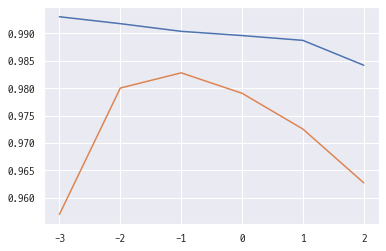

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [46]:
# alpha값은 -1 ~ 0.1 사이가 좋다
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386937
